In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv ('GBPUSD.csv')

In [4]:
temp = df['Close']
n = len(temp)
print(n)

958


In [5]:
temp = np.log(temp)
y = np.zeros(n-1)
z = np.zeros(n-1)

In [6]:
for t in range(0,n-1):
    z[t] = temp[t+1] - temp[t]
for t in range(0,n-1):
    y[t] = z[t] - sum(z) / (n-1)

In [7]:
time = np.arange(n-1)

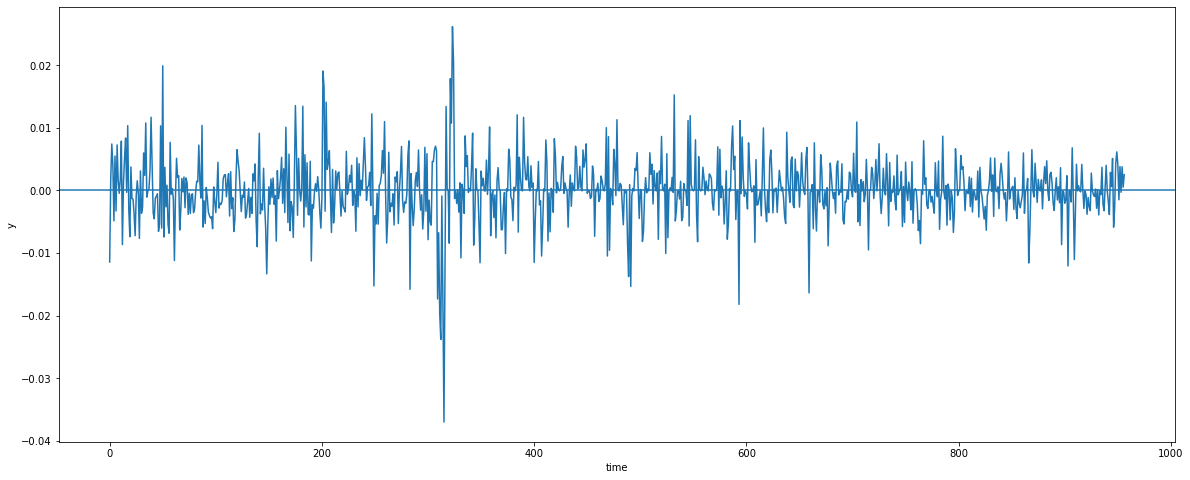

In [11]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
plt.xlabel('time')
plt.ylabel('y')
plt.plot(time,y)
plt.axhline(y=0)
f.savefig('SV_y.png', dpi=100)
plt.show()

In [19]:
    nt = n - 1
    sig_ep  = math.pow(math.pi, 2) / 2             # process err variance
    sig_eta  = 2                             # obs error variance
    T = 0.99
    a = np.zeros(nt)
    P = np.zeros(nt)


    v = np.zeros(nt)
    F = np.zeros(nt)
    K = np.zeros(nt)


    a[0] = 0
    P[0] = sig_eta / (1 - math.pow(T,2))


    v[0] = np.log(math.pow(y[0],2))+1.2704 - a[0]
    F[0] = P[0] + sig_ep
    K[0] = T * P[0]/F[0]


    for t in range(1,nt):
        a[t] = T * a[t-1] + K[t-1]*v[t-1]
        P[t] = T * P[t-1]*(T-K[t-1]) + sig_eta


        v[t] = np.log(math.pow(y[t],2)) + 1.2704 - a[t]
        F[t] = P[t] + sig_ep
        K[t] = T * P[t]/F[t]

    print(sum(np.log(F)+np.power(v,2)/F))

29191.907208551012


In [ ]:
def f(x):
    nt = n - 1
    sig_ep  = math.pow(math.pi, 2) / 2             # process err variance
    sig_eta  = x[0]                                # obs error variance
    T = x[1]
    a = np.zeros(nt)
    P = np.zeros(nt)


    v = np.zeros(nt)
    F = np.zeros(nt)
    K = np.zeros(nt)


    a[0] = 0
    P[0] = sig_eta / (1 - math.pow(T,2))


    v[0] = np.log(math.pow(y[0],2))+1.2704 - a[0]
    F[0] = P[0] + sig_ep
    K[0] = T * P[0]/F[0]


    for t in range(1,nt):
        a[t] = T * a[t-1] + K[t-1]*v[t-1]
        P[t] = T * P[t-1]*(T-K[t-1]) + sig_eta


        v[t] = np.log(math.pow(y[t],2)) + 1.2704 - a[t]
        F[t] = P[t] + sig_ep
        K[t] = T * P[t]/F[t]

    return(sum(np.log(F)+np.power(v,2)/F))